# 1. Matrice de design

In [5]:
name_trainX = "trainX_indexMaxAmpFastOne_5_feat"
name_testX = "testX_indexMaxAmpFastOne_5_feat"

## 1.1. Construction de la matrice

In [6]:
from feature_extraction import *
import numpy as np
import h5py

X_train_fft = h5py.File('data/X_train_fft.h5','r')
X_train_fft_balanced = h5py.File('data/X_train_fft_balanced.h5','r')
X_test_fft = h5py.File('data/X_test_fft.h5','r')
X_train_time = h5py.File('data/train.h5','r')
X_train_time_balanced = h5py.File('data/X_train_balanced.h5','r')
X_test_time = h5py.File('data/test.h5','r')

features= [distanceMinMaxOne,
           maxAmpOne, 
           freqMinLimitAmpOne, 
           nbPikesFastOne, 
           indexMaxAmpFastOne,
           meanDiffNeighbOne,
           stdDeviationNbOne,
           upperRightOne]

feat_params = [[10],
               [],
               [0.15],
               [10, 0.15],
               [5],
               [],
               [10],
               [0.2,100]]

mat_bool_extract_signal = np.array([
                [0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0],
                [1,1,1,1,1,1,1,1,1,1,1],
                [0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0]])

X_train_preprocessed = extractMultiFeatureAll(X_train_fft, features, feat_params, mat_bool_extract_signal, save=True, name_save = name_trainX)
X_test_preprocessed = extractMultiFeatureAll(X_test_fft, features, feat_params, mat_bool_extract_signal, save=True, name_save = name_testX)

Progress...
|_________|
|=====>

C:\Users\alexa\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


====|
Progress...
|_________|
|=========|


## 1.2. Chargement de la matrice

In [2]:
import pickle

temp_var_file = open("design_matrix/" + name_trainX + '.txt','rb')
X_train_preprocessed = pickle.load(temp_var_file)
temp_var_file.close()

temp_var_file = open("design_matrix/" + name_testX + '.txt','rb')
X_test_preprocessed = pickle.load(temp_var_file)
temp_var_file.close()

# 2. Apprentissage

In [7]:
from cross_validation_learning import *
from ml_methods import *

## 2.1. K-NN

Progress...
|____|
|====|


C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


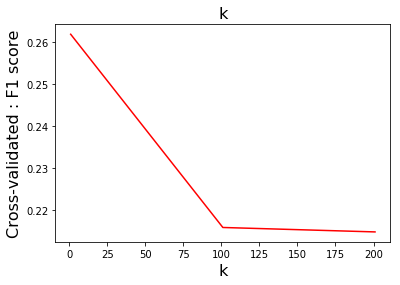

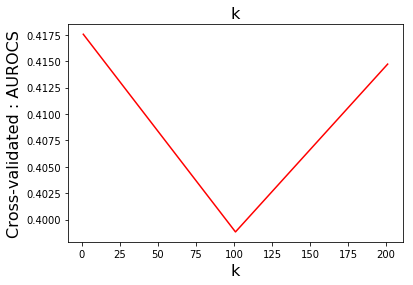

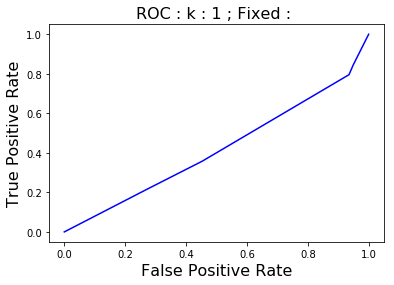

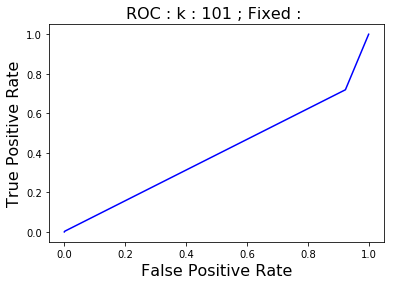

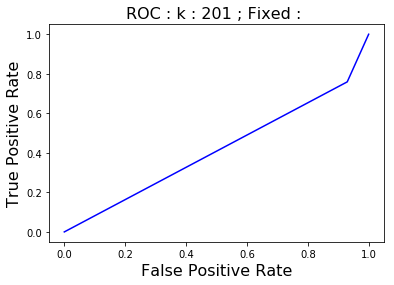

In [4]:
""" myKNeighborsClassifier(n_neighbors) """
mat_theta, mat_ypred, mat_yprob, clf = learn(X_train_preprocessed, myKNeighborsClassifier, [[i for i in range(1,300,100)]], 10)

visualizeResults(mat_theta, mat_ypred, mat_yprob, 0, "k", [], xscale="linear", plot_roc=True)

## 2.2. Régression logistique

Progress...
|____________|
|============|


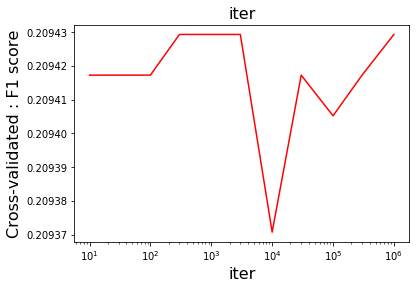

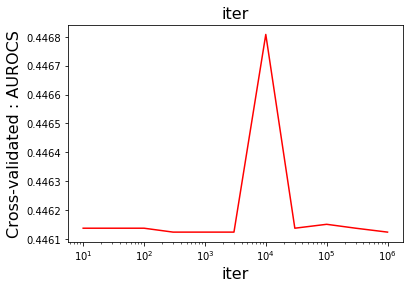

In [5]:
""" myLogisticRegression(C, max_iter) """
#mat_theta, mat_ypred, mat_yprob, clf = cross_validation_learning.learn(X_train_preprocessed, linear_model.LogisticRegression, [[]], 10)
#mat_theta, mat_ypred, mat_yprob, clf = cross_validation_learning.learn(X_train_preprocessed, linear_model.LogisticRegression, [['l2'], [False], [0.0001,0.0002,0.0003], [1,1000]], 10)
#mat_theta, mat_ypred, mat_yprob, clf = cross_validation_learning.learn(X_train_preprocessed, linear_model.LogisticRegression, [['l2'], [False], [0.0001]], 10)
mat_theta, mat_ypred, mat_yprob, clf = learn(X_train_preprocessed, myLogisticRegression, [[0.03],[10,30,100,300,1000,3000,10000,30000,100000,300000,1000000]], 10)

#cross_validation_learning.visualizeResults(mat_theta, mat_ypred, mat_yprob, 0, "", [])
#cross_validation_learning.visualizeResults(mat_theta, mat_ypred, mat_yprob, 3, "C", [0, 0, 0])
#cross_validation_learning.visualizeResults(mat_theta, mat_ypred, mat_yprob, 0, "", [0, 0])
visualizeResults(mat_theta, mat_ypred, mat_yprob, 1, "iter", [0], xscale="log", plot_roc=False)

## 2.3. Arbre de décision

In [12]:
""" myDecisionTreeClassifier(splitter, min_samples_leaf, max_leaf_nodes, class_weight) """

splitter=['best']
min_samples_leaf=[1000]
max_leaf_nodes=[100]
class_weight= [{0:2,1:4,2:1,3:1,4:1}]
n_folds=10

mat_theta, mat_ypred, mat_yprob, clf = learn(X_train_preprocessed, myDecisionTreeClassifier, [splitter, min_samples_leaf, max_leaf_nodes, class_weight], n_folds)

visualizeResults(mat_theta, mat_ypred, mat_yprob, 3, "min_samples_leaf", [0,0,0], xscale="linear", plot_roc=True)

Progress...
|__|
|=>()
=|
F1-score : 0.2352125001218827


Matrice de confusion : 

		True 0  True 1  True 2  True 3  True 4
Predicted 0	1020	359	1215	259	971
Predicted 1	225	139	382	63	389
Predicted 2	2092	797	14699	5053	7932
Predicted 3	0	0	0	0	0
Predicted 4	282	58	836	356	1162


## 2.4. K-Means

In [26]:
""" myKMeans(n_clusters) """
mat_theta, mat_ypred, mat_yprob, clf = learn(X_train_preprocessed, myKMeans, [[5]], 10)

visualizeResults(mat_theta, mat_ypred, mat_yprob, 0, "", [], xscale="linear", plot_roc=True)

Progress...
|__|
|==|
F1-score : 0.07127164924795204


Matrice de confusion : 

		True 0  True 1  True 2  True 3  True 4
Predicted 0	1894	722	11937	3958	7111
Predicted 1	696	267	3494	1152	2085
Predicted 2	823	312	1399	531	1044
Predicted 3	31	0	18	1	13
Predicted 4	175	52	284	89	201


## 2.5. SVM

In [27]:
""" myLinearSVC() """
mat_theta, mat_ypred, mat_yprob, clf = learn(X_train_preprocessed, myLinearSVC, [[]], 10)

visualizeResults(mat_theta, mat_ypred, mat_yprob, 0, "", [], xscale="linear", plot_roc=True)

F1-score : 0.16269083490329167


Matrice de confusion : 

		True 0  True 1  True 2  True 3  True 4
Predicted 0	430	92	177	42	176
Predicted 1	0	0	0	0	0
Predicted 2	3180	1258	16945	5689	10269
Predicted 3	0	0	0	0	0
Predicted 4	9	3	10	0	9


# 3. Prédiction

In [ ]:
""" The prediction will be done with the last classifier used for training """
predict(X_test_preprocessed, clf, save=True, name_save = "First")